In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
folder_path = os.path.join(os.getcwd(), "time data")
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}

for file, df in dataframes.items():
    print(f"\n--- First 5 rows of {file} ---")
    print(df.head())


,--- First 5 rows of Real_Estate_(Residential_Details).csv ---
,   RecordID_Int ParcelNumber StreetNumber   StreetName Unit  \
,0             1    010001600          600    MASSIE RD  NaN   
,1             2    010005000         2030  BARRACKS RD  NaN   
,2             3    010006000         2028  BARRACKS RD  NaN   
,3             4    010007000         1930  BARRACKS RD  NaN   
,4             5    010008000         1924  BARRACKS RD  NaN   
,
,                       UseCode            Style Grade                    Roof  \
,0  Multipurpose Bldg (College)          2 Story     A                   Metal   
,1                  Vacant Land              NaN   NaN                     NaN   
,2                Single Family          2 Story     A  Architectural Shingles   
,3                Single Family  2 Sty Excellent   A -                   Slate   
,4                  Vacant Land              NaN   NaN                     NaN   
,
,   Flooring  ... Bedrooms HalfBathrooms  FullBathrooms 

In [3]:
merged_df = None

#merge the two datasets on parcel number
for file, df in dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on="ParcelNumber", how="inner")  # Inner join


merged_df.to_csv("merged_data.csv", index=False)
merged_df.head()

,RecordID_Int_x,ParcelNumber,StreetNumber_x,StreetName_x,Unit_x,UseCode,Style,Grade,Roof,Flooring,...,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,RecordID_Int_y,SaleDate,SaleAmount,StreetName_y,StreetNumber_y,Unit_y,BookPage
0,1,010001600,600,MASSIE RD,NaN,Multipurpose Bldg (College),2 Story,A,Metal,None,...,Wood,2.00,3672.0,28,1900/01/01 05:00:00+00,0,MASSIE RD,600,NaN,0:0
1,2,010005000,2030,BARRACKS RD,NaN,Vacant Land,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,64,2024/06/28 04:00:00+00,581500,BARRACKS RD,2030,NaN,2024:1553
2,2,010005000,2030,BARRACKS RD,NaN,Vacant Land,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,65,1993/02/18 05:00:00+00,0,BARRACKS RD,2030,NaN,651:842
3,2,010005000,2030,BARRACKS RD,NaN,Vacant Land,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,66,1993/02/18 05:00:00+00,0,BARRACKS RD,2030,NaN,651:842
4,3,010006000,2028,BARRACKS RD,NaN,Single Family,2 Story,A,Architectural Shingles,Hardwood,...,Brick Veneer,2.00,2786.0,67,2023/12/15 05:00:00+00,1305000,BARRACKS RD,2028,NaN,2023:2799


In [4]:
merged_df.columns.tolist()

['RecordID_Int_x',
 'ParcelNumber',
 'StreetNumber_x',
 'StreetName_x',
 'Unit_x',
 'UseCode',
 'Style',
 'Grade',
 'Roof',
 'Flooring',
 'Heating',
 'Fireplace',
 'YearBuilt',
 'TotalRooms',
 'Bedrooms',
 'HalfBathrooms',
 'FullBathrooms',
 'BasementGarage',
 'Basement',
 'FinishedBasement',
 'BasementType',
 'ExternalWalls',
 'NumberOfStories',
 'SquareFootageFinishedLiving',
 'RecordID_Int_y',
 'SaleDate',
 'SaleAmount',
 'StreetName_y',
 'StreetNumber_y',
 'Unit_y',
 'BookPage']

In [5]:
columns_to_keep = ['ParcelNumber','SaleAmount', 'SaleDate','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade']
merged_df = merged_df[[col for col in columns_to_keep if col in merged_df.columns]]
merged_df.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade
0,010001600,0,1900/01/01 05:00:00+00,4,1920.0,3672.0,A
1,010005000,581500,2024/06/28 04:00:00+00,NaN,NaN,NaN,NaN
2,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
3,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
4,010006000,1305000,2023/12/15 05:00:00+00,5,1940.0,2786.0,A


In [6]:
#remove rows with empty values
merged_df = merged_df.dropna()

#remove rows where the sale amount equals 0
merged_df_clean = merged_df[merged_df["SaleAmount"] != 0]

#save changes to CSV
merged_df_clean.to_csv("merged_data_clean.csv", index=False)

#reomve rows with no data
merged_df_clean = merged_df_clean[merged_df_clean.apply(lambda row: 'No dat' not in row.values, axis=1)]

#remove bedroom outlier
merged_df_clean = merged_df_clean[merged_df_clean['Bedrooms'] != '2215']

#convert Bedrooms to numeric and to int
merged_df_clean['Bedrooms'] = pd.to_numeric(merged_df_clean['Bedrooms'], errors='coerce').astype('Int64')

#keep only rows where 'YearBuilt' is between 1950 and 2025
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] >= 1950]
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] <= 2025]

#convert sale date to a datetime format and then extract just the year
merged_df_clean['SaleDateYr'] = pd.to_datetime(merged_df_clean['SaleDate'])
merged_df_clean['SaleDateYr'] = merged_df_clean['SaleDateYr'].dt.year

#turn the letter grades into numerical scores
grade_mapping = {
    "A++": 10, "A +": 9, "A": 8.5, "A -": 8,
    "B++": 7.5, "B +": 7, "B": 6.5, "B -": 6,
    "C++": 5.5, "C +": 5, "C": 4.5, "C -": 4,
    "D +": 3.5, "D": 3, "D -": 2.5, "E": 2
}
#create a new column for grades out of 10
merged_df_clean['Grade out of 10'] = merged_df_clean['Grade'].map(grade_mapping)
enrollment_data = pd.read_csv("UVA Enrollment Data.csv")

#convert year to numeric
enrollment_data["Year"] = pd.to_numeric(enrollment_data["Year"], errors="coerce")

#remove rows with missing years and enrollment data
enrollment_data = enrollment_data.dropna(subset=["Year"])
enrollment_data = enrollment_data.dropna(subset=["Total Enrollment"])

#remove rows where total enrollment is NaN
enrollment_data["Total Enrollment"] = pd.to_numeric(enrollment_data["Total Enrollment"], errors="coerce")

#convert year column to integer
enrollment_data = enrollment_data[enrollment_data["Total Enrollment"] != 'nan']

#convert 'saleDateYr' column to integer 
enrollment_data["Year"] = enrollment_data["Year"].astype(int)

#merge the cleaned data by year
merged_df_clean['SaleDateYr'] = merged_df_clean['SaleDateYr'].astype(int)

#save the final dataset to CSV
merged_df_clean = pd.merge(merged_df_clean, enrollment_data, left_on="SaleDateYr", right_on="Year", how="left")
merged_df_clean.to_csv("cleaned_housing.csv", index=False)
merged_df_clean.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade,SaleDateYr,Grade out of 10,Year,Total Enrollment,Undergraduate Enrollment,Graduate Enrollment
0,010010000,575000,2018/10/31 04:00:00+00,4,1950.0,2144.0,B++,2018,7.5,2018.0,24639.0,16777.0,7862.0
1,010011000,205000,1984/05/16 04:00:00+00,6,1954.0,3392.0,B +,1984,7.0,1984.0,16531.0,10962.0,5569.0
2,010011000,970000,2018/01/10 05:00:00+00,6,1954.0,3392.0,B +,2018,7.0,2018.0,24639.0,16777.0,7862.0
3,010012000,785000,2020/06/26 04:00:00+00,3,1952.0,2520.0,B++,2020,7.5,2020.0,25642.0,17314.0,8328.0
4,010012000,512000,2015/05/04 04:00:00+00,3,1952.0,2520.0,B++,2015,7.5,2015.0,23883.0,16736.0,7147.0


In [7]:
#drop empty sale amount rows
merged_df_clean["SaleAmount"] = merged_df_clean["SaleAmount"].dropna()

In [8]:
merged_df_clean['Bedrooms'].unique()

<IntegerArray>
[4, 6, 3, 2, 7, 5, 1, 8, 10, 0, 12, 9]
Length: 12, dtype: Int64

In [9]:
merged_df_clean['Grade'].unique()

array(['B++', 'B +', 'A -', 'A', 'C', 'B', 'B -', 'C++', 'C +', 'A +',
       'D', 'C -', 'A++', 'D +', 'D -', 'E'], dtype=object)

In [10]:
merged_df_clean['Grade out of 10'].unique()

array([ 7.5,  7. ,  8. ,  8.5,  4.5,  6.5,  6. ,  5.5,  5. ,  9. ,  3. ,
        4. , 10. ,  3.5,  2.5,  2. ])

In [11]:
merged_df_clean['YearBuilt'].unique()

array([1950., 1954., 1952., 1958., 2002., 1951., 1970., 1953., 2005.,
       1956., 1957., 1955., 1979., 2014., 1990., 1971., 1969., 1964.,
       2000., 1960., 1980., 1959., 1981., 1968., 2010., 1975., 1973.,
       1967., 2023., 2006., 1994., 1997., 1998., 1999., 2001., 2004.,
       1963., 2013., 2015., 2011., 2021., 1962., 1966., 1961., 1976.,
       1987., 1972., 1992., 1983., 1991., 2016., 1993., 2007., 1984.,
       1965., 2022., 1986., 2012., 2017., 1985., 1978., 2019., 2009.,
       1996., 2008., 2018., 1989., 1977., 1982., 2020., 1995., 1974.,
       2003., 1988., 2024.])

In [12]:
merged_df_clean['SaleDateYr'].unique()

array([2018, 1984, 2020, 2015, 1973, 2002, 1996, 1958, 2017, 2000, 1993,
       2005, 2008, 2003, 2001, 2006, 2023, 2010, 2022, 1994, 1989, 1991,
       2019, 1999, 2004, 2014, 2007, 1995, 2012, 2021, 1997, 1985, 2013,
       1979, 1992, 1976, 2016, 1971, 1952, 2024, 2011, 2009, 1983, 1988,
       1998, 1986, 1977, 1980, 1972, 1970, 1987, 1990, 1978, 1951, 1953,
       1982, 1974, 1975, 1969, 1963, 1954, 1965, 1957, 1961, 1981, 1968,
       1967, 1962, 1966, 1964, 1956, 1955, 1960, 1946, 1959, 1950, 1947,
       1949, 1909, 1945, 1944, 1948])

In [13]:
#convert total enrollment to numeric
merged_df_clean["Total Enrollment"] = pd.to_numeric(merged_df_clean["Total Enrollment"], errors="coerce")  # Converts 'nan' & bad values to NaN
merged_df_clean = merged_df_clean.dropna(subset=["Total Enrollment"])  # Remove NaNs
merged_df_clean["Total Enrollment"] = merged_df_clean["Total Enrollment"].astype(int)
merged_df_clean['Total Enrollment'].unique()

array([24639, 16531, 25642, 23883, 13732, 21536, 19789, 24360, 20810,
       19711, 22071, 22813, 21446, 21133, 22371, 25944, 24391, 26149,
       19724, 17444, 17606, 25018, 20794, 21691, 23732, 22534, 20025,
       23907, 26026, 20262, 16889, 23464, 16464, 19867, 15529, 23898,
       12351, 26470, 24297, 24355, 16379, 17168, 20448, 16985, 15903,
       16452, 12907, 10852, 17034, 17662, 16179, 16446, 14382, 15179,
        9735, 16420,  9011,  8597,  7873])

In [14]:
#get average CPI value per year
df_CPI = pd.read_csv("CPI.csv")
print(df_CPI.head())

# Convert 'DATE' to datetime format and extract the year (SaleDate)
df_CPI['DATE'] = pd.to_datetime(df_CPI["DATE"])
df_CPI["SaleDateYr"] = df_CPI["DATE"].dt.year
# Extract two-digit year
df_CPI["Year_2digit"] = df_CPI["DATE"].dt.year % 100  # Get last two digits

# Convert to full year
df_CPI["SaleDateYr"] = df_CPI["Year_2digit"].apply(lambda x: 1900 + x if x >= 47 else 2000 + x)

# Drop the temporary two-digit year column
df_CPI.drop(columns=["Year_2digit"], inplace=True)

# Compute the average CPI per year
average_cpi_per_sale_date = df_CPI.groupby("SaleDateYr")["CPI"].mean().reset_index()

# Merge the yearly average CPI back into the original DataFrame
df_CPI = df_CPI.merge(average_cpi_per_sale_date, on="SaleDateYr", suffixes=("", "_Avg"))

print(df_CPI)
df_CPI_clean = df_CPI.drop(columns=['CPI', 'DATE'])
print(df_CPI_clean)

     DATE    CPI
,0  1/1/47  21.48
,1  2/1/47  21.62
,2  3/1/47  22.00
,3  4/1/47  22.00
,4  5/1/47  21.95
,          DATE      CPI  SaleDateYr     CPI_Avg
,0   2047-01-01   21.480        1947   22.331667
,1   2047-02-01   21.620        1947   22.331667
,2   2047-03-01   22.000        1947   22.331667
,3   2047-04-01   22.000        1947   22.331667
,4   2047-05-01   21.950        1947   22.331667
,..         ...      ...         ...         ...
,933 2024-10-01  315.564        2024  313.697833
,934 2024-11-01  316.449        2024  313.697833
,935 2024-12-01  317.603        2024  313.697833
,936 2025-01-01  319.086        2025  319.430500
,937 2025-02-01  319.775        2025  319.430500
,
,[938 rows x 4 columns]
,     SaleDateYr     CPI_Avg
,0          1947   22.331667
,1          1947   22.331667
,2          1947   22.331667
,3          1947   22.331667
,4          1947   22.331667
,..          ...         ...
,933        2024  313.697833
,934        2024  313.697833
,935        2024  

In [15]:
#add the CPI values of each year (sale date) into the big DF on the Sale Date column
merged_df_clean = merged_df_clean.merge(df_CPI_clean, on="SaleDateYr", how="left")
print(merged_df_clean)

#get the CPI for 2024 year
cpi_2024 = average_cpi_per_sale_date[average_cpi_per_sale_date["SaleDateYr"] == 2024]["CPI"].values[0]
merged_df_clean["SaleAmount_2024"] = merged_df_clean["SaleAmount"] * (cpi_2024 / merged_df_clean["CPI_Avg"])

       ParcelNumber  SaleAmount                SaleDate  Bedrooms  YearBuilt  \
,0         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,1         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,2         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,3         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,4         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,...             ...         ...                     ...       ...        ...   
,292075    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292076    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292077    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292078    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292079    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,
,        SquareFootageFinis

In [16]:
merged_df_clean = merged_df_clean.dropna(subset=["SaleAmount_2024"])
merged_df_clean['SaleAmount_2024'] = merged_df_clean['SaleAmount_2024'].astype(int)
#drop NaN columns

print(merged_df_clean)

       ParcelNumber  SaleAmount                SaleDate  Bedrooms  YearBuilt  \
,0         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,1         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,2         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,3         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,4         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,...             ...         ...                     ...       ...        ...   
,292075    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292076    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292077    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292078    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292079    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,
,        SquareFootageFinis

In [17]:
# Count duplicates based on columns 'A' and 'B'
print(merged_df_clean['SaleAmount'].isnull().sum())
duplicates = merged_df_clean.duplicated(subset=['SaleAmount', 'ParcelNumber'], keep=False)  # Keep=False marks all duplicates
df_duplicates = merged_df_clean[duplicates]
print(df_duplicates) #list of duplicates
merged_df_clean = merged_df_clean.drop_duplicates(subset=['SaleAmount', 'ParcelNumber'], keep='first')
merged_df_clean.head()

0
,       ParcelNumber  SaleAmount                SaleDate  Bedrooms  YearBuilt  \
,0         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,1         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,2         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,3         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,4         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
,...             ...         ...                     ...       ...        ...   
,292075    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292076    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292077    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292078    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,292079    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
,
,        SquareFootageFi

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade,SaleDateYr,Grade out of 10,Year,Total Enrollment,Undergraduate Enrollment,Graduate Enrollment,CPI_Avg,SaleAmount_2024
0,010010000,575000,2018/10/31 04:00:00+00,4,1950.0,2144.0,B++,2018,7.5,2018.0,24639,16777.0,7862.0,251.099500,718345
12,010011000,205000,1984/05/16 04:00:00+00,6,1954.0,3392.0,B +,1984,7.0,1984.0,16531,10962.0,5569.0,103.933333,618743
24,010011000,970000,2018/01/10 05:00:00+00,6,1954.0,3392.0,B +,2018,7.0,2018.0,24639,16777.0,7862.0,251.099500,1211818
36,010012000,785000,2020/06/26 04:00:00+00,3,1952.0,2520.0,B++,2020,7.5,2020.0,25642,17314.0,8328.0,258.855750,951312
48,010012000,512000,2015/05/04 04:00:00+00,3,1952.0,2520.0,B++,2015,7.5,2015.0,23883,16736.0,7147.0,237.001750,677688


In [18]:
# Compute mean and standard deviation
mean_price = merged_df_clean['SaleAmount_2024'].mean()
std_price = merged_df_clean['SaleAmount_2024'].std()

# Compute Z-scores
merged_df_clean['Z_score'] = (merged_df_clean['SaleAmount_2024'] - mean_price) / std_price

# Filter out rows where |Z-score| > 3
df_filtered = merged_df_clean[abs(merged_df_clean['Z_score']) <= 3]

# Drop the Z-score column
df_filtered = df_filtered.drop(columns=['Z_score'])

# Save the cleaned dataset
df_filtered.to_csv('SaleAmount_2024_cleaned.csv', index=False)

df_filtered.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade,SaleDateYr,Grade out of 10,Year,Total Enrollment,Undergraduate Enrollment,Graduate Enrollment,CPI_Avg,SaleAmount_2024
0,010010000,575000,2018/10/31 04:00:00+00,4,1950.0,2144.0,B++,2018,7.5,2018.0,24639,16777.0,7862.0,251.099500,718345
12,010011000,205000,1984/05/16 04:00:00+00,6,1954.0,3392.0,B +,1984,7.0,1984.0,16531,10962.0,5569.0,103.933333,618743
24,010011000,970000,2018/01/10 05:00:00+00,6,1954.0,3392.0,B +,2018,7.0,2018.0,24639,16777.0,7862.0,251.099500,1211818
36,010012000,785000,2020/06/26 04:00:00+00,3,1952.0,2520.0,B++,2020,7.5,2020.0,25642,17314.0,8328.0,258.855750,951312
48,010012000,512000,2015/05/04 04:00:00+00,3,1952.0,2520.0,B++,2015,7.5,2015.0,23883,16736.0,7147.0,237.001750,677688


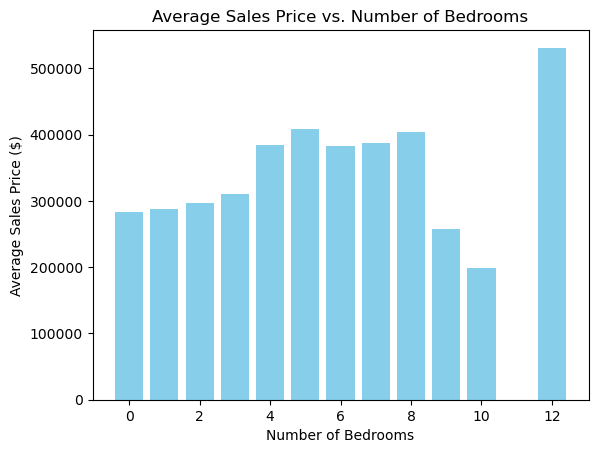

In [19]:
avg_prices = df_filtered.groupby('Bedrooms')['SaleAmount_2024'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Number of Bedrooms')

# Show the chart
plt.show()

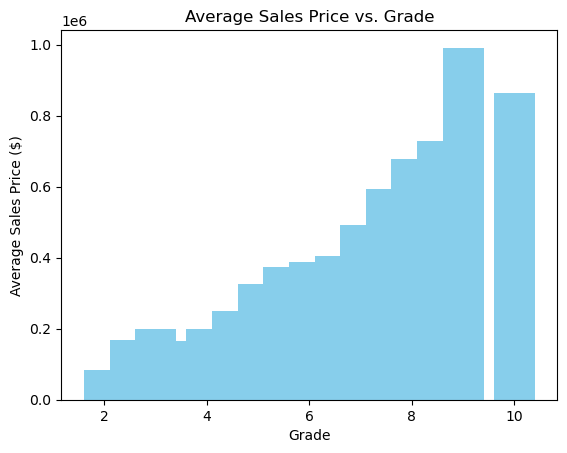

In [20]:
avg_prices = df_filtered.groupby('Grade out of 10')['SaleAmount_2024'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Grade')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Grade')

# Show the chart
plt.show()

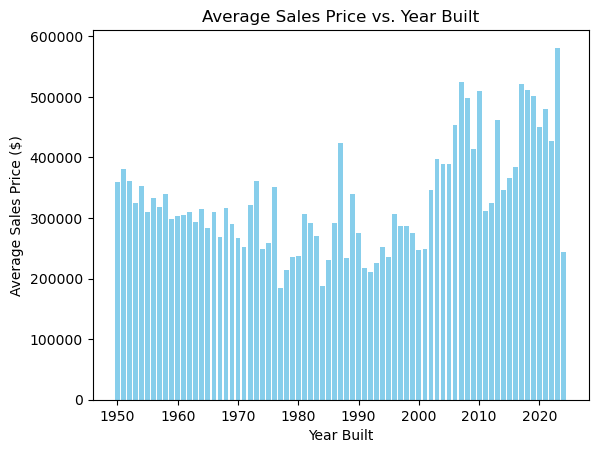

In [21]:
avg_prices = df_filtered.groupby('YearBuilt')['SaleAmount_2024'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Year Built')

# Show the chart
plt.show()

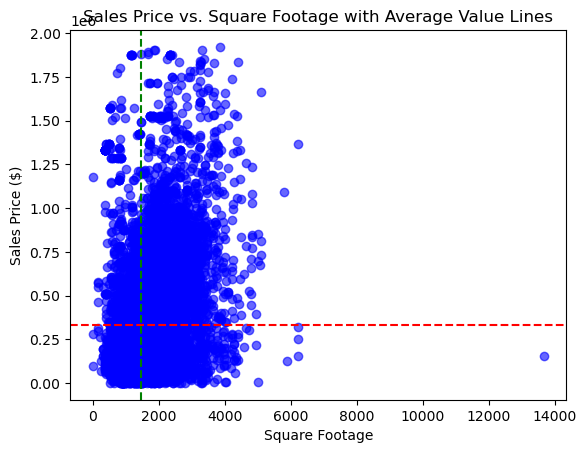

In [22]:
x = df_filtered['SquareFootageFinishedLiving']
y = df_filtered['SaleAmount_2024']

plt.scatter(x, y, color='blue', alpha=0.6)

x_avg = np.mean(x)
y_avg = np.mean(y)

plt.axhline(y_avg, color='red', linestyle='--', label=f'Avg Y: {y_avg:.2f}')

# Optionally, add a vertical line at the average x-value
plt.axvline(x_avg, color='green', linestyle='--', label=f'Avg X: {x_avg:.2f}')

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('Sales Price ($)')
plt.title('Sales Price vs. Square Footage with Average Value Lines')

# Show the plot
plt.show()

R² value: 0.6490


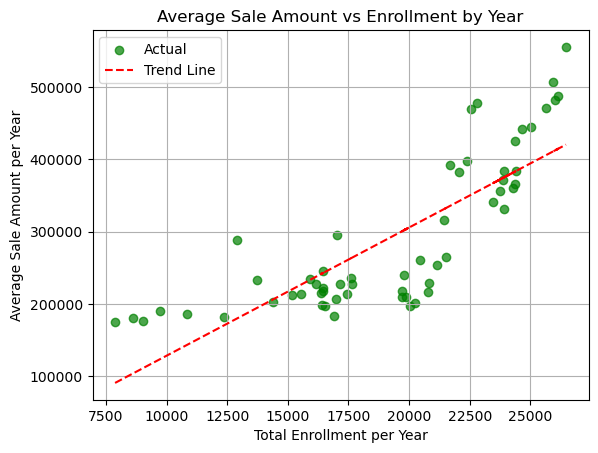

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Group by year
yearly_avg = df_filtered.groupby('Year').agg({
    'SaleAmount_2024': 'mean',
    'Total Enrollment': 'first'  # or 'sum' depending on your data
}).reset_index()

# Define X and y for regression
X = yearly_avg[['Total Enrollment']].values  # 2D array for sklearn
y = yearly_avg['SaleAmount_2024'].values     # 1D array

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)
print(f"R² value: {r2:.4f}")

# Plot
plt.scatter(X, y, color='green', alpha=0.7, label='Actual')
plt.plot(X, y_pred, color='red', linestyle='--', label='Trend Line')
plt.xlabel("Total Enrollment per Year")
plt.ylabel("Average Sale Amount per Year")
plt.title("Average Sale Amount vs Enrollment by Year")
plt.legend()
plt.grid(True)
plt.show()


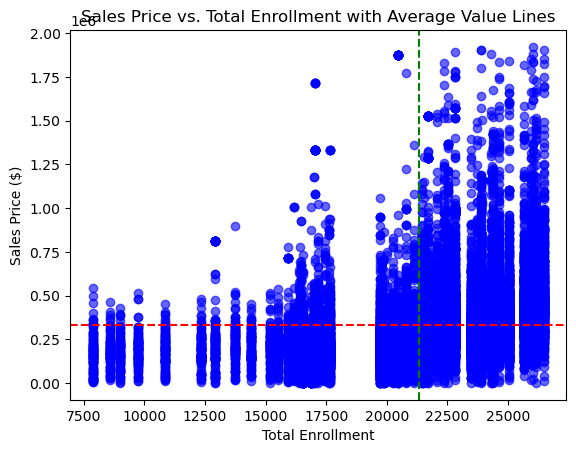

In [24]:
x = df_filtered['Total Enrollment']
y = df_filtered['SaleAmount_2024']

plt.scatter(x, y, color='blue', alpha=0.6)

x_avg = np.mean(x)
y_avg = np.mean(y)

plt.axhline(y_avg, color='red', linestyle='--', label=f'Avg Y: {y_avg:.2f}')

# Optionally, add a vertical line at the average x-value
plt.axvline(x_avg, color='green', linestyle='--', label=f'Avg X: {x_avg:.2f}')

# Add labels and title
plt.xlabel('Total Enrollment')
plt.ylabel('Sales Price ($)')
plt.title('Sales Price vs. Total Enrollment with Average Value Lines')

# Show the plot
plt.show()

In [25]:
df_filtered.loc[:,['SaleDateYr', 'SaleAmount_2024']].groupby(['SaleDateYr']).describe()

SaleAmount_2024                                                    \
                     count           mean            std      min        25%   
SaleDateYr                                                                     
1966                 117.0  175646.042735  109930.054837   3864.0  101439.00   
1967                  96.0  180089.739583   88587.125521  14098.0  135113.00   
1968                  85.0  177148.317647   94841.614240    901.0  112705.00   
1969                 110.0  190933.527273   90057.228596   8551.0  135288.50   
1970                 113.0  186137.787611   95950.832198  10499.0  122760.00   
1971                 144.0  181623.652778   85339.311637   5424.0  131729.00   
1972                 134.0  287872.156716  240839.367298    750.0  142561.00   
1973                 108.0  233159.444444  123004.907369  14122.0  165940.00   
1974                 109.0  202679.660550   92216.142136  10813.0  141529.00   
1975                  96.0  212706.489583  103827.857802   1165.0  156629.50   
1976                 146.0  213454.246575   88622.438955  16529.0  176317.00   
1977                 191.0  235012.000000  145386.036603   7762.0  163403.50   
1978                 188.0  228310.074468  137814.472642   9135.0  156267.00   
1979                 172.0  245782.197674  127670.610735   4321.0  172875.00   
1980                 180.0  221596.388889  123051.693162      3.0  146599.00   
1981                 175.0  198669.600000  114317.028356   6382.0  140491.00   
1982                 151.0  217937.735099  134431.233259   8449.0  144327.00   
1983                 237.0  214932.894515  104459.185968    582.0  149629.00   
1984                 234.0  197430.636752  110600.488344      3.0  141140.75   
1985                 314.0  183501.117834  107650.154609      2.0  131193.00   
1986                 367.0  206998.618529  115831.791452      2.0  142990.00   
1987                 376.0  295340.859043  324925.355104      2.0  137912.00   
1988                 382.0  227155.945026  133323.426709    265.0  148494.00   
1989                 360.0  214297.038889  141807.405218   8858.0  126550.00   
1990                 350.0  227241.285714  178360.415357      2.0  134450.00   
1991                 327.0  235634.981651  153630.015171      2.0  146289.50   
1992                 335.0  210237.662687  107131.438745      2.0  149684.50   
1993                 386.0  218487.735751  131570.638792      2.0  142735.00   
1994                 450.0  209790.651111  137932.044903      2.0  133330.00   
1995                 356.0  196818.671348  103707.214469   6517.0  140114.00   
1996                 421.0  240690.852732  158814.346822    199.0  146193.00   
1997                 405.0  201677.276543  123819.947212    467.0  126045.00   
1998                 525.0  261291.438095  293962.158345      1.0  139039.00   
1999                 533.0  217240.322702  141508.369458   1883.0  135585.00   
2000                 538.0  228876.243494  150734.638576  10019.0  152848.00   
2001                 542.0  253506.088561  157008.300210    885.0  161569.00   
2002                 533.0  265240.512195  179724.635026   1046.0  139524.00   
2003                 550.0  316563.576364  189770.788136     17.0  194356.00   
2004                 706.0  392873.090652  283992.049917    166.0  242133.00   
2005                 653.0  382017.819296  183016.048925   4080.0  269090.00   
2006                 868.0  397675.451613  219810.832979    155.0  261781.00   
2007                 780.0  469978.519231  262908.529842      1.0  279892.00   
2008                 698.0  478267.159026  313982.564704  14573.0  269607.00   
2009                 477.0  366331.064990  188719.156600   2375.0  245619.00   
2010                 428.0  384219.095794  238912.252113   4833.0  230695.25   
2011                 428.0  360660.483645  241844.764280   2092.0  214895.00   
2012                 526.0  330828.636882  195678.037511  34159.0  198122.00   
2013       

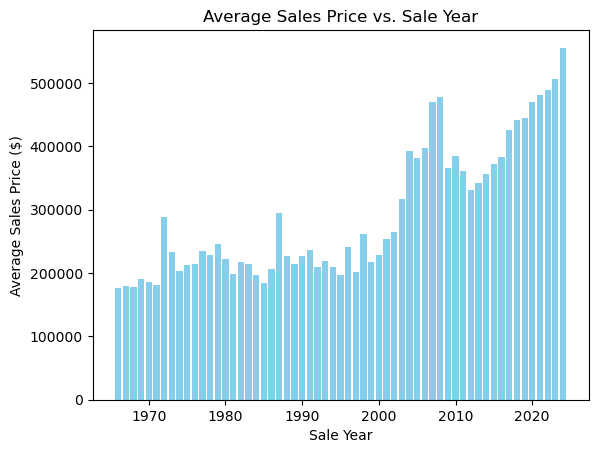

In [26]:
avg_prices = df_filtered.groupby('SaleDateYr')['SaleAmount_2024'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Sale Year')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Sale Year')

# Show the chart
plt.show()

In [27]:
from sklearn import tree
columns_to_keep1 = ['SaleAmount_2024', 'SaleDateYr','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade out of 10', "Total Enrollment"]
reg_df = df_filtered[[col for col in columns_to_keep1 if col in df_filtered.columns]]

reg_df.head()

,SaleAmount_2024,SaleDateYr,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade out of 10,Total Enrollment
0,718345,2018,4,1950.0,2144.0,7.5,24639
12,618743,1984,6,1954.0,3392.0,7.0,16531
24,1211818,2018,6,1954.0,3392.0,7.0,24639
36,951312,2020,3,1952.0,2520.0,7.5,25642
48,677688,2015,3,1952.0,2520.0,7.5,23883


In [28]:
from sklearn import tree
columns_to_keep1 = ['SaleAmount_2024', 'SaleDateYr','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade out of 10', "Total Enrollment"]
reg_df = df_filtered[[col for col in columns_to_keep1 if col in df_filtered.columns]]

reg_df.head()

,SaleAmount_2024,SaleDateYr,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade out of 10,Total Enrollment
0,718345,2018,4,1950.0,2144.0,7.5,24639
12,618743,1984,6,1954.0,3392.0,7.0,16531
24,1211818,2018,6,1954.0,3392.0,7.0,24639
36,951312,2020,3,1952.0,2520.0,7.5,25642
48,677688,2015,3,1952.0,2520.0,7.5,23883


In [29]:
from sklearn.model_selection import train_test_split

def quick_tree(df,depth=5):
    # Resample and Process data:
    df_t = df.sample(n=df.shape[0],replace=True)
    y = df_t['SaleAmount_2024']
    X = df_t.drop(['SaleAmount_2024'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=depth) # Create a classifier object
    cart = cart.fit(X_train, y_train) # Fit the classifier
    plt.figure(figsize=(20, 20))
    # Visualize results:
    tree.plot_tree(cart,feature_names=X_train.columns.to_list(),filled=True)
    # Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_test.mean())**2 )
    Rsq = 1 - SSE/TSS
    print(Rsq)

0.4723128327495212


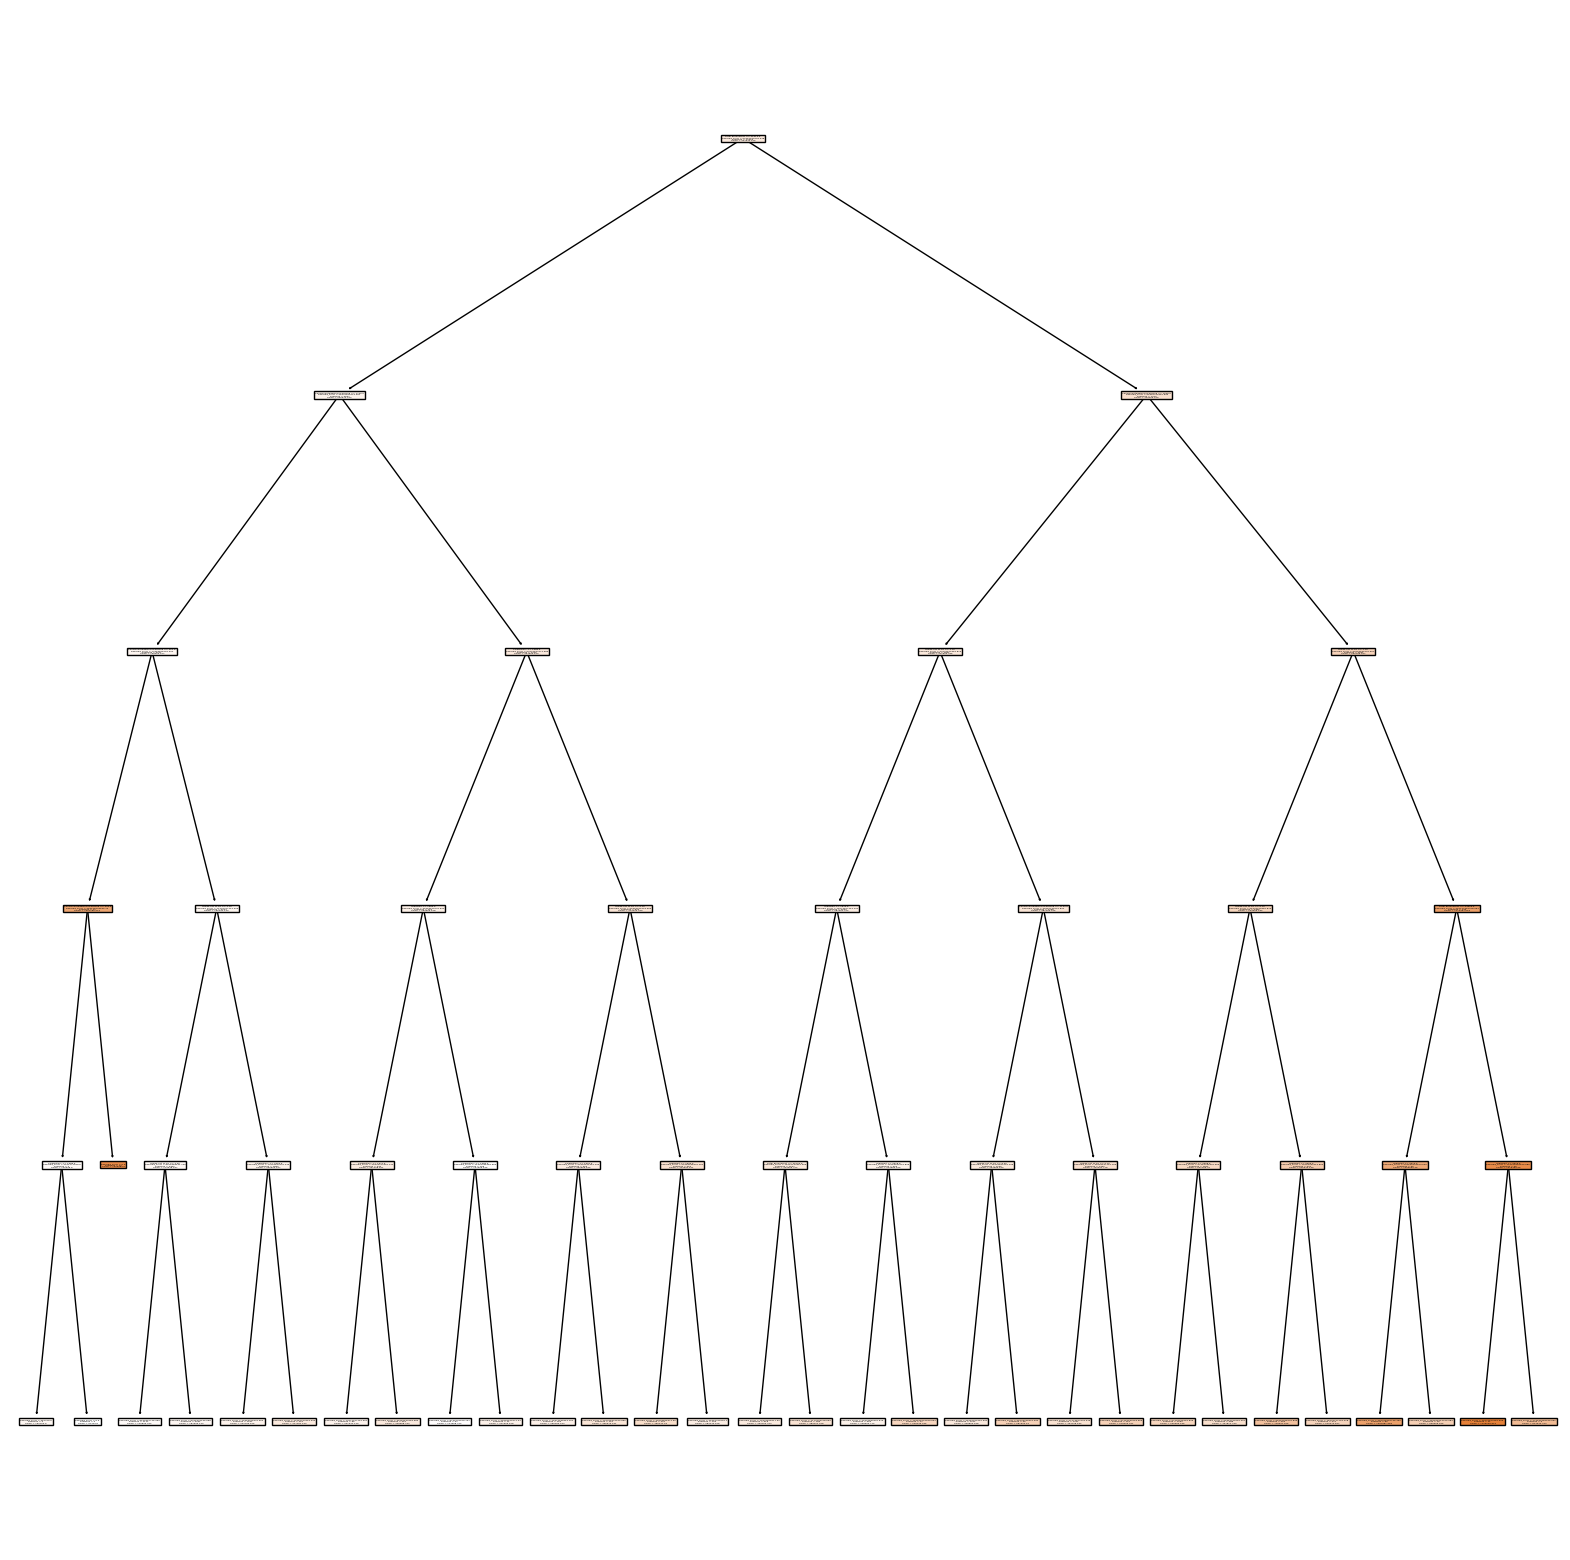

In [30]:
quick_tree(reg_df)

In [31]:
# Split data into training rows and testing rows:
N = reg_df.shape[0]
reg_df = reg_df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)
df_train = reg_df[0:train_size]
N_train = df_train.shape[0]
df_test = reg_df[train_size:]
N_test = df_test.shape[0]

# Bootstrap:
T = 1000
m_depth = 5
Rsq = np.zeros(T) # preallocate the rsq measure
y_test_hat = np.zeros([T,N_test]) # preallocate predictions on test set
df_train.head()

# Split data into train/test:
X_train = df_train.drop(['SaleAmount_2024'],axis=1)
y_train = df_train['SaleAmount_2024']
X_test = df_test.drop(['SaleAmount_2024'],axis=1)
y_test = df_test['SaleAmount_2024']

# Bootstrapping:
for s in range(T):
    # Generate a bootstrap sample:
    df_s = df_train.sample(frac=1, replace=True)
    X_s = df_s.drop('SaleAmount_2024',axis=1)
    y_s = df_s['SaleAmount_2024']
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=m_depth) # Create a classifier object
    cart = cart.fit(X_s, y_s) # Fit the classifier
    # Compute Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_s.mean())**2 )
    Rsq[s] = 1 - SSE/TSS
    # Make and Save Predictions:
    y_test_hat[s,:] = y_hat

# Ensemble predictor:
y_hat_ensemble = y_test_hat.mean(axis=0) # Average the columns to get the ensemble prediction
SSE = np.sum( (y_test-y_hat_ensemble)**2 )
TSS = np.sum( (y_test-y_train.mean())**2 )
Rsq_ensemble = 1 - SSE/TSS

print(Rsq_ensemble)

0.5142660145021166


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

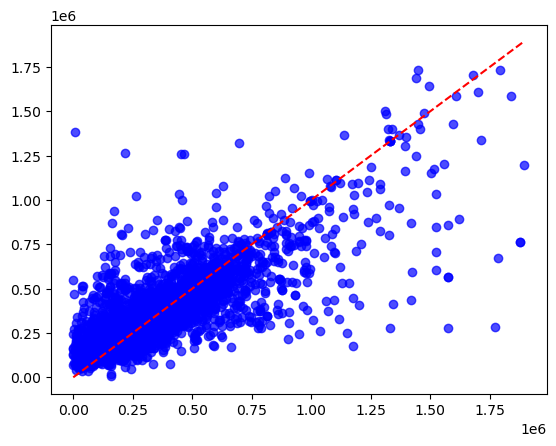

In [33]:
plt.scatter(y_test, y_hat_rf, color="blue", alpha=0.7, label="Predicted vs Actual")
min_val = min(min(y_test), min(y_hat_rf))
max_val = max(max(y_test), max(y_hat_rf))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal Line")

In [34]:
rf.score(X_test,y_test) # Rsq measure

0.6339619512320989

Text(0, 0.5, 'Mean decrease in impurity')

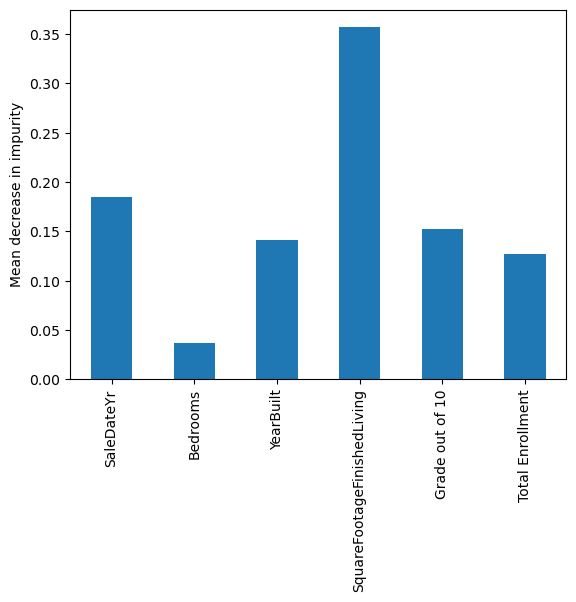

In [35]:
# Variable importance plot:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()
plt.ylabel("Mean decrease in impurity")

0.190926534946946


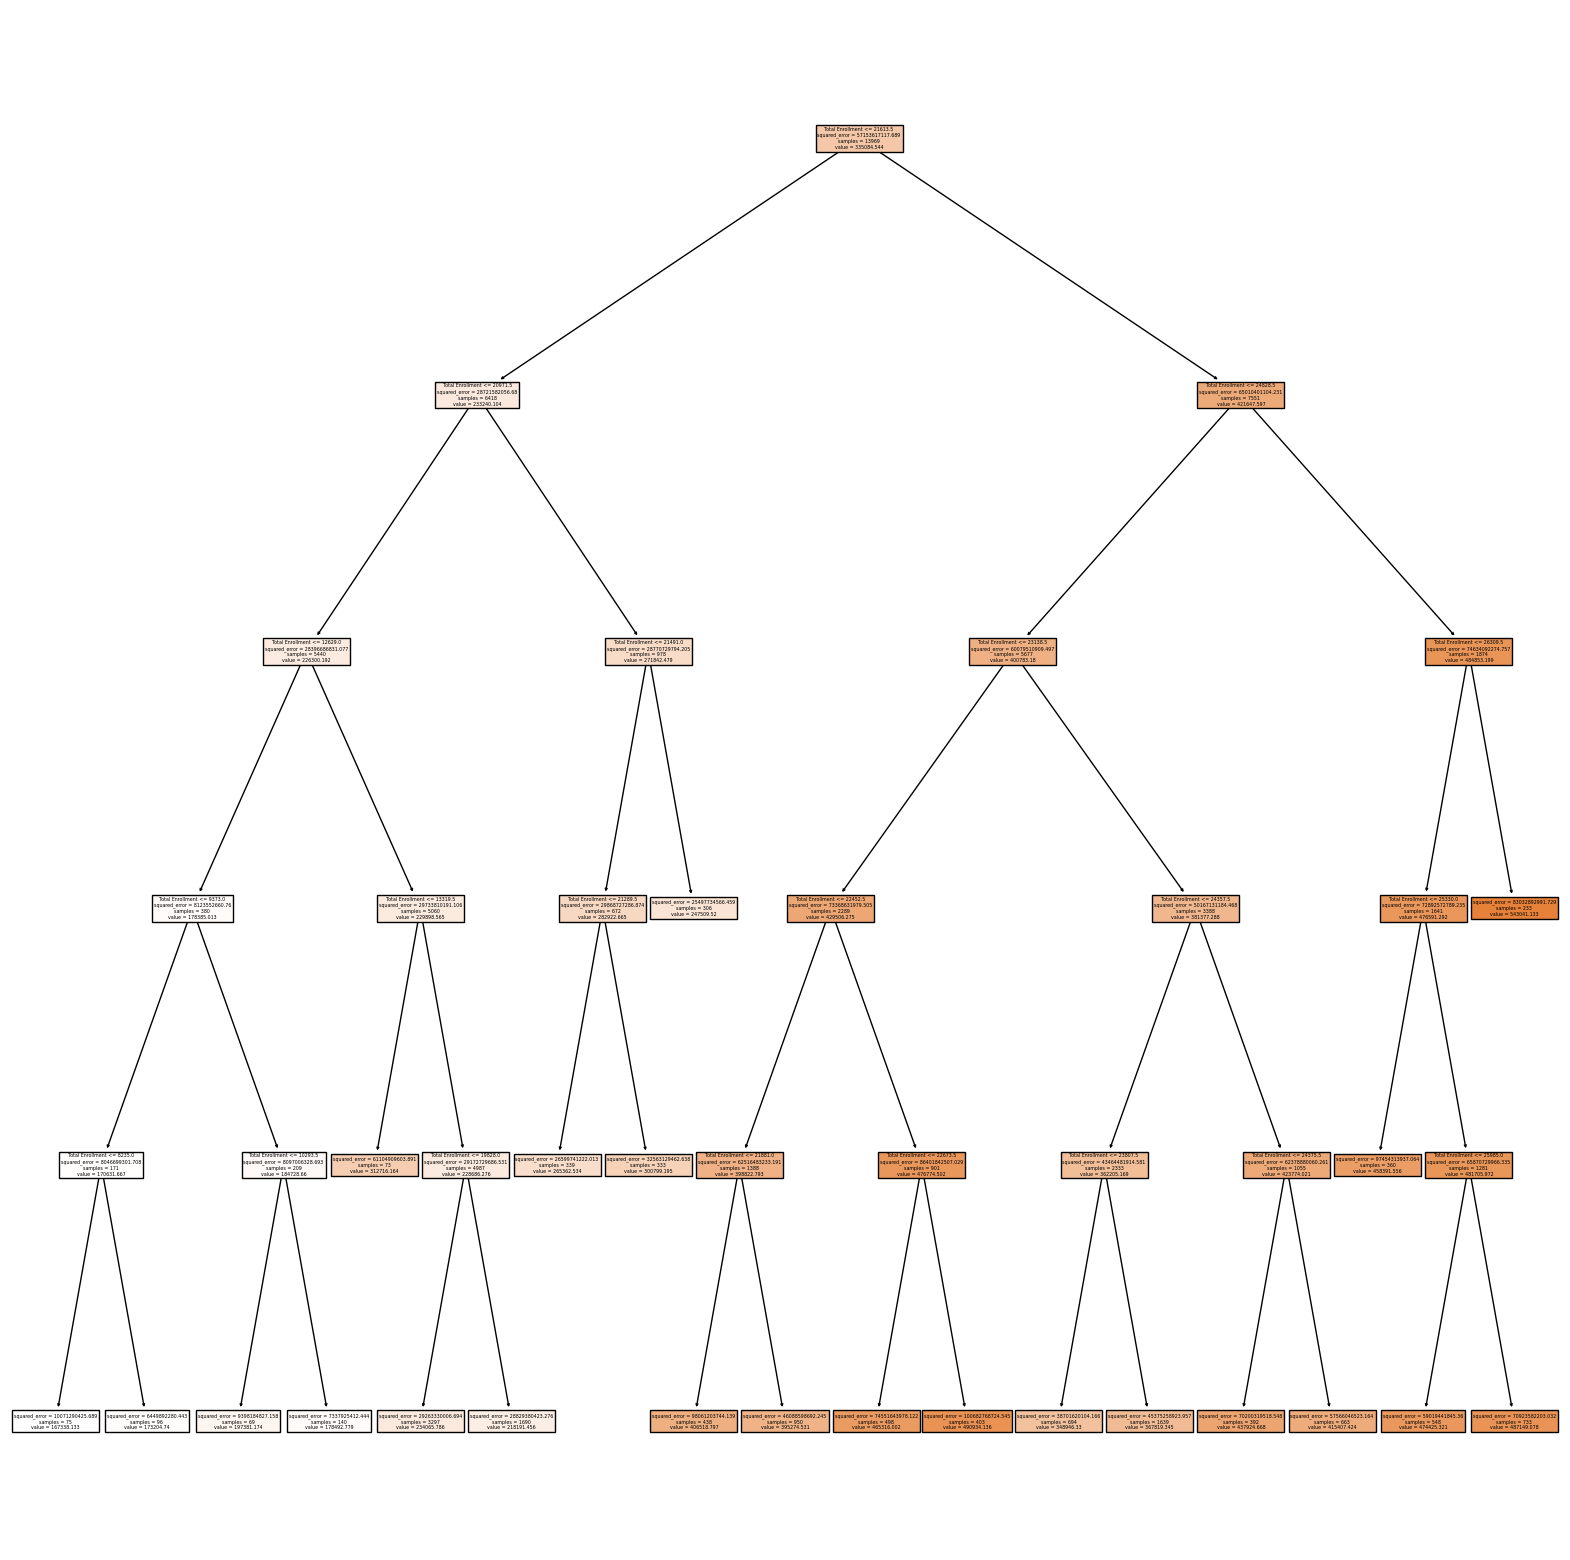

In [36]:
columns_to_keep2 = ['SaleAmount_2024', "Total Enrollment"]
reg_df2 = df_filtered[[col for col in columns_to_keep2 if col in df_filtered.columns]]
quick_tree(reg_df2)

In [37]:
# Split data into training rows and testing rows:
N = reg_df2.shape[0]
reg_df2 = reg_df2.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)
df_train = reg_df2[0:train_size]
N_train = df_train.shape[0]
df_test = reg_df2[train_size:]
N_test = df_test.shape[0]

# Bootstrap:
T = 1000
m_depth = 5
Rsq = np.zeros(T) # preallocate the rsq measure
y_test_hat = np.zeros([T,N_test]) # preallocate predictions on test set
df_train.head()

# Split data into train/test:
X_train = df_train.drop(['SaleAmount_2024'],axis=1)
y_train = df_train['SaleAmount_2024']
X_test = df_test.drop(['SaleAmount_2024'],axis=1)
y_test = df_test['SaleAmount_2024']

# Bootstrapping:
for s in range(T):
    # Generate a bootstrap sample:
    df_s = df_train.sample(frac=1, replace=True)
    X_s = df_s.drop('SaleAmount_2024',axis=1)
    y_s = df_s['SaleAmount_2024']
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=m_depth) # Create a classifier object
    cart = cart.fit(X_s, y_s) # Fit the classifier
    # Compute Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_s.mean())**2 )
    Rsq[s] = 1 - SSE/TSS
    # Make and Save Predictions:
    y_test_hat[s,:] = y_hat

# Ensemble predictor:
y_hat_ensemble = y_test_hat.mean(axis=0) # Average the columns to get the ensemble prediction
SSE = np.sum( (y_test-y_hat_ensemble)**2 )
TSS = np.sum( (y_test-y_train.mean())**2 )
Rsq_ensemble = 1 - SSE/TSS

print(Rsq_ensemble)

0.20052655977346767


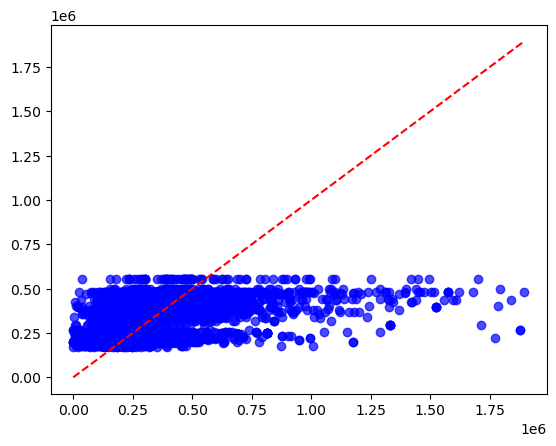

In [38]:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test)
plt.scatter(y_test, y_hat_rf, color="blue", alpha=0.7) # Predicted v Actual
min_val = min(min(y_test), min(y_hat_rf))
max_val = max(max(y_test), max(y_hat_rf))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal Line")

In [39]:
rf.score(X_test,y_test)

0.20217808140285687

Text(0, 0.5, 'Mean decrease in impurity')

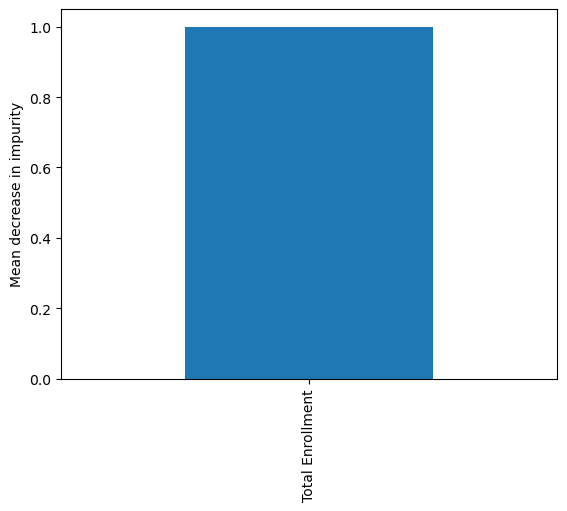

In [40]:
# Variable importance plot:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()
plt.ylabel("Mean decrease in impurity")